# Library

In [240]:
import numpy as np
import matplotlib.pyplot as plt

# Seed Buat Konsistensi

In [241]:
np.random.seed(0)

# Toy Dataset

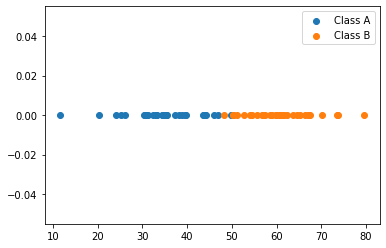

In [242]:
n_sample = 32
_a_x = np.random.normal(32, 8, size=n_sample)
_b_x = np.random.normal(64, 8, size=n_sample)

x = np.concatenate((_a_x, _b_x))
y = np.concatenate((np.zeros(n_sample), np.ones(n_sample)))

plt.scatter(_a_x, np.zeros(n_sample), label='Class A')
plt.scatter(_b_x, np.zeros(n_sample), label='Class B')
plt.legend()

# Model Definisi

In [243]:
def forward(x, w, b, activation: lambda x: x):
    return activation(x * w + b)


logistic = lambda x: 1. / (1. + np.exp(-x))

# Parameter Definisi

In [244]:
w = np.random.randn(1)
b = 0.

print(f"w: {w[0]}, b: {b}")

w: 0.17742614225375283, b: 0.0


# Sebelum Training

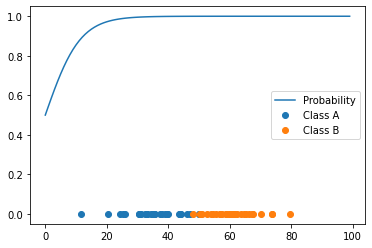

In [245]:
plt.plot(np.arange(100), forward(np.arange(100), w, b, logistic), label='Probability')
plt.scatter(x[y==0], np.zeros(len(x))[y==0], label='Class A')
plt.scatter(x[y==1], np.zeros(len(x))[y==1], label='Class B')
plt.legend()

In [246]:
y_pred = forward(x, w, b, logistic)
y_pred_class = np.where(y_pred > 0.5, 1, 0)
print(f"Accuracy: {np.mean(y_pred_class == y)}")

Accuracy: 0.5


# Training/Fitting

In [247]:
def loss(y_pred, y):
    return np.mean(np.square(y_pred - y))


def gradient_decent(x, y, w, b, act, learning_rate):
    for i in range(100000):
        y_pred = forward(x, w, b, act)
        l = loss(y_pred, y)
        w -= learning_rate * np.mean(x * (y_pred - y))
        b -= learning_rate * np.mean(y_pred - y)
        if i % 1000 == 0:
            print(f"Loss: {l}")
    return w, b, l


w, b, l = gradient_decent(x, y, w, b, logistic, 1e-3)
print(f"w: {w[0]:.3f}, b: {b:.3f}, loss: {l:.3f}")

Loss: 0.4932538212120722
Loss: 0.22823792163865186
Loss: 0.22171698446672766
Loss: 0.21545879712300922
Loss: 0.20945831097610135
Loss: 0.20370936072474538
Loss: 0.19820488160842054
Loss: 0.19293711169247207
Loss: 0.1878977758342265
Loss: 0.18307824937676506
Loss: 0.17846970083657773
Loss: 0.17406321382216877
Loss: 0.16984988914356705
Loss: 0.16582092856822528
Loss: 0.16196770197926066
Loss: 0.15828179983454538
Loss: 0.15475507284694195
Loss: 0.15137966074091241
Loss: 0.148148011817793
Loss: 0.14505289490465734
Loss: 0.14208740508790085
Loss: 0.13924496445560167
Loss: 0.13651931890140753
Loss: 0.13390453188292462
Loss: 0.1313949758826101
Loss: 0.12898532219043712
Loss: 0.1266705295152714
Loss: 0.12444583183529473
Loss: 0.12230672581576746
Loss: 0.12024895805348723
Loss: 0.11826851234995275
Loss: 0.11636159716794006
Loss: 0.11452463338752975
Loss: 0.11275424244624814
Loss: 0.1110472349227637
Loss: 0.10940059960344765
Loss: 0.10781149305522218
Loss: 0.10627722971568018
Loss: 0.10479527250

# Setelah Training

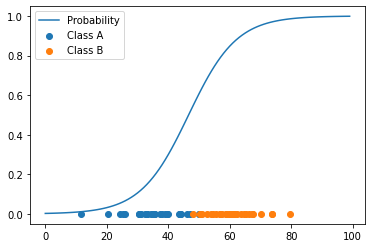

In [248]:
plt.plot(np.arange(100), forward(np.arange(100), w, b, logistic), label='Probability')
plt.scatter(x[y==0], np.zeros(len(x))[y==0], label='Class A')
plt.scatter(x[y==1], np.zeros(len(x))[y==1], label='Class B')
plt.legend()